In [1]:
from deep_neural_network_model import DNN
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, metrics, model_selection, preprocessing
from tensorflow.keras.datasets import mnist

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-08-28 11:52:28.799725: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# IRIS Dataset test

In [2]:
iris = datasets.load_iris()

X = np.array(iris.data[:100])
Y = np.array(iris.target[:100])

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test = X_test.T
Y_test = Y_test.reshape(1,len(Y_test))

In [3]:
print(X_train.shape)
print(X_test.shape)

(4, 80)
(4, 20)


In [4]:
model = DNN()
model.train(X_train=X_train, Y_train=Y_train, layer_dims=[5,4,1])

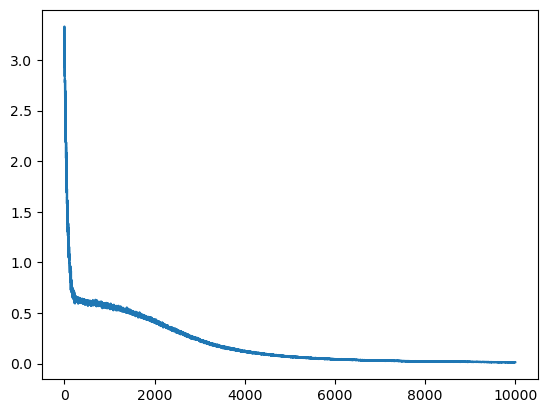

In [5]:
plt.plot(model.cost_during_training)

In [6]:
preds = model.predict(X_test)
pred_labels = preds > 0.5
test_accuracy = np.sum(pred_labels == Y_test) / Y_test.shape[1]
print(test_accuracy)

1.0


Model predicts perfectly on iris test dataset

# Breast Cancer Data

In [7]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [8]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data For Better Training and also for avoiding Zero Division Errors in the beggining of learning
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)

X_train_std = X_train_std.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test_std = X_test_std.T
Y_test = Y_test.reshape(1,len(Y_test))

print(f"{X_train_std.shape} and {Y_train.shape}")
print(f"{X_test_std.shape} and {Y_test.shape}")

(30, 455) and (1, 455)
(30, 114) and (1, 114)


In [10]:
model = DNN()
model.train(X_train=X_train_std, Y_train=Y_train, layer_dims=[10, 3, 3, 1], epoch=10_000)

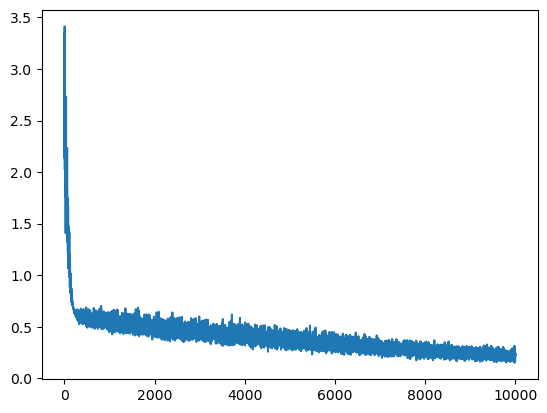

In [11]:
plt.plot(model.cost_during_training)

In [12]:
preds = model.predict(X_test_std)
pred_labels = preds > 0.5
train_accuracy = np.sum(pred_labels == Y_test) / Y_test.shape[1]
print(train_accuracy)

0.9649122807017544


Our network also performs well on Breast Cancer Test Dataset

# CIFAR-10 Dataset Test

In [13]:
# load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

indices_0_1_train = np.where((Y_train == 0) | (Y_train == 1))
indices_0_1_test = np.where((Y_test == 0) | (Y_test == 1))

X_train = X_train[indices_0_1_train]
Y_train = Y_train[indices_0_1_train]

X_test = X_test[indices_0_1_test]
Y_test = Y_test[indices_0_1_test]

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Standardize Pixel values
X_train_std = X_train / 255.0
X_test_std  = X_test / 255.0

X_train_std = X_train_std.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test_std = X_test_std.T
Y_test = Y_test.reshape(1,len(Y_test))

print(f"{X_train_std.shape} and {Y_train.shape}")
print(f"{X_test_std.shape} and {Y_test.shape}")

(784, 12665) and (1, 12665)
(784, 2115) and (1, 2115)


In [15]:
model = DNN()
model.train(X_train=X_train_std, Y_train=Y_train, layer_dims=[100, 50, 10, 1], epoch=500)

/Users/eno/Documents/myRepos/Deep_Neural_Network_From_Scratch/deep_neural_network_model.py:97: RuntimeWarning: divide by zero encountered in log
  cost_value = (1/m) * np.sum(-(Y*np.log(Y_hat) + (1-Y)*np.log(1-Y_hat)))
/Users/eno/Documents/myRepos/Deep_Neural_Network_From_Scratch/deep_neural_network_model.py:97: RuntimeWarning: invalid value encountered in multiply
  cost_value = (1/m) * np.sum(-(Y*np.log(Y_hat) + (1-Y)*np.log(1-Y_hat)))


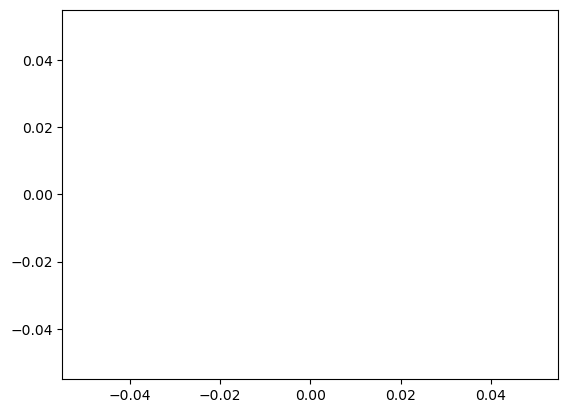

In [16]:
plt.plot(model.cost_during_training)

In [17]:
preds = model.predict(X_test_std)
pred_labels = preds > 0.5
test_accuracy = np.sum(pred_labels == Y_test) / Y_test.shape[1]
print(f"Label 1 Ratio: {np.sum(Y_test) / Y_test.shape[1]}")
print(test_accuracy)

Label 1 Ratio: 0.5366430260047281
0.5366430260047281


The model has the exploiting gradients problem and in large networks this problem is an obstacle for learning.
We have seen it performed OKAY on small classification problems, but it does not work fine with image classification